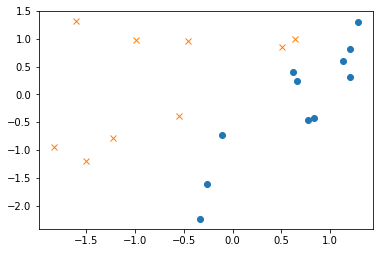

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 学習データを読み込む
train = np.loadtxt('s4_s1_images.csv', delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

# パラメータを初期化
theta = np.random.rand(3)

# 標準化
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)

def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

# x0を加える

def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

# 標準化した学習データをプロット

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

In [7]:
# シグモイド関数

def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))


# 学習率
ETA = 1e-3

# 繰り返し回数
epoch = 5000

for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)
   

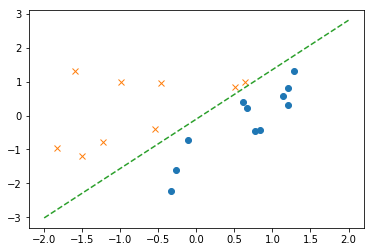

In [9]:
x0 = np.linspace(-2, 2, 100) 

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed') 
plt.show()

In [10]:
f(to_matrix(standardize([
    [200,100],
    [100,200],
])))

In [11]:
# 確率をそのままだすとピンとこないのでしきい値を決めて1 or 0を返す
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

classify(
    to_matrix(standardize([
        [200,100],
        [100,200],
    ]))
)

array([1, 0])